In [79]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import model_selection 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np

In [12]:
#open train data
df_train = pd.read_csv('train_data.csv')
X_train_main, y_train_main = df_train.iloc[:,:-1], df_train.iloc[:,-1]

#open test data
df_test = pd.read_csv('test_data.csv')
X_test_main, y_test_main = df_test.iloc[:,:-1], df_test.iloc[:,-1]

In [58]:
kf = KFold(n_splits = 5, 
          shuffle = True #shuffle provides more robustness in the model
          )
kf.get_n_splits(X_train_main)

5

In [59]:
for train_index, test_index in kf.split(X_train_main):
    X_train_fold, X_test_fold = X_train_main.loc[train_index],X_train_main.loc[test_index]
    y_train_fold, y_test_fold = y_train_main.loc[train_index], y_train_main.loc[test_index]
    
    print(X_train_fold)
    print(X_test_fold)

        B1    B2    B3    B4   B5   B6   B7
0     1012  1184  1394  1183  120  219  307
1     1236  1486  1737  1568  560  412  467
2      855  1042  1261   957  265  500  414
3     1089  1329  1547  1376  190  304  367
4     1025  1177  1394  1194  378  336  406
...    ...   ...   ...   ...  ...  ...  ...
1565  1139  1366  1599  1481  357  238  318
1566  1121  1356  1594  1392  161  264  350
1567  1123  1388  1642  1344  446  691  577
1568   888  1102  1337  1026   99  332  264
1569  1135  1384  1639  1362  465  691  576

[1256 rows x 7 columns]
        B1    B2    B3    B4   B5   B6   B7
15    1195  1446  1693  1512  326  345  419
17     988  1148  1388  1194  112  170  259
24    1151  1387  1614  1413  197  311  390
37     828  1011  1261   922  235  478  395
38     827  1001  1260   907  318  530  432
...    ...   ...   ...   ...  ...  ...  ...
1533  1228  1462  1719  1599  410  293  373
1535   990  1224  1443  1131  159  429  346
1537  1222  1443  1624  1481  400  474  517
1543  1

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


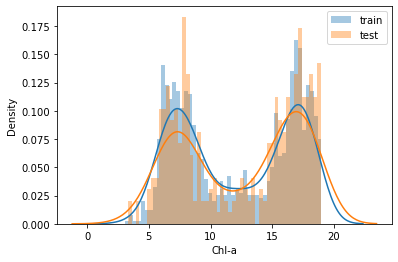

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


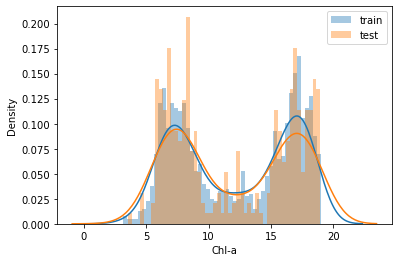

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


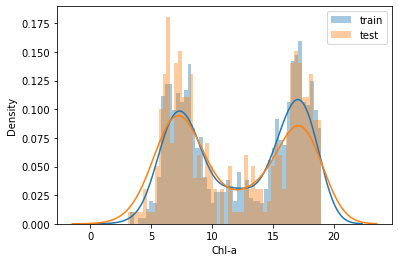

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


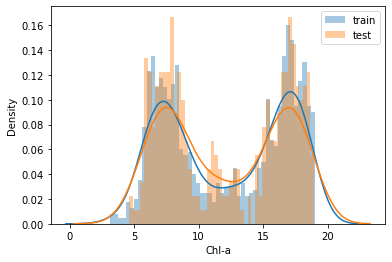

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


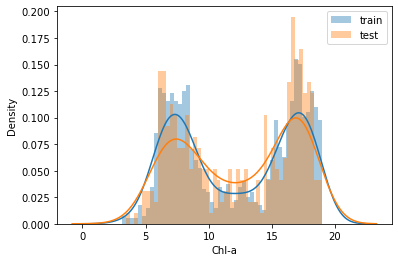

In [60]:
for train_index, test_index in kf.split(X_train_main):
    X_train_fold, X_test_fold = X_train_main.loc[train_index],X_train_main.loc[test_index]
    y_train_fold, y_test_fold = y_train_main.loc[train_index], y_train_main.loc[test_index]
    
    sns.distplot((y_train_fold),
                 bins = 50, 
                 label = 'train')
    sns.distplot((y_test_fold),
                 bins = 50,
                label = 'test')
    plt.legend()
    plt.show()

# Shortcut for using un stratified Kfold

In [74]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, 
                         X_train_main, y_train_main, cv = 5,
                        scoring = 'r2')
print(scores)
print(f'average: {scores.mean()}')

[0.57672943 0.52433887 0.6351596  0.61295575 0.64129748]
average: 0.5980962240575697


# stratified Kfold for regression

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


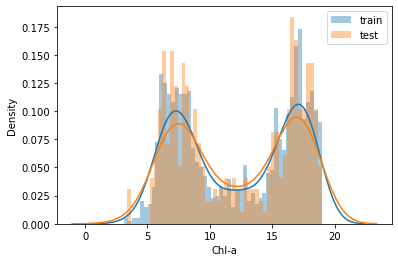

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


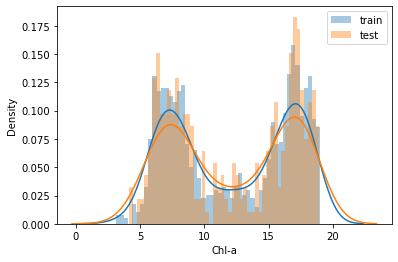

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


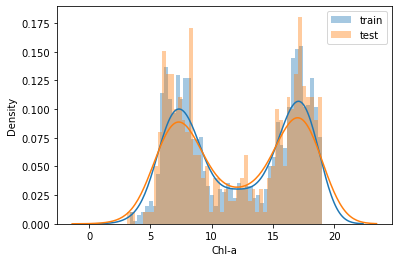

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


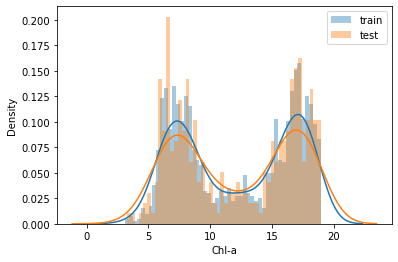

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


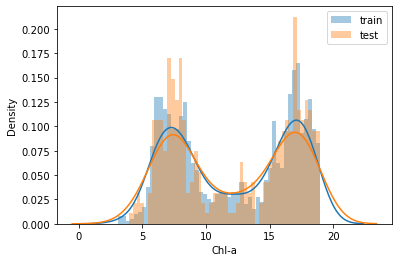

In [61]:
X_cols = ['B1','B2','B3',    
           'B4','B5','B6','B7']
y_col = 'Chl-a'

#create new column and fill it with -1
df_train["K-FOLD"] = -1   

#randomize row of data
df_train = df_train.sample(frac = 1).reset_index(drop=True)  

#calculate the sturges rule. take the floor value
num_bins = int(np.floor(1 + np.log2(len(df_train))))  

#bin targets
df_train.loc[:, "BINS"] = pd.cut(  
    df_train[y_col], 
    bins = num_bins, 
    labels = False)  

#initiate kfold using sklearn's stratified kf
kf = model_selection.StratifiedKFold(n_splits = 5,
                                    shuffle = True #true for robustness
                                    )  

#fill the new kfold column   
for f, (t, v) in enumerate(kf.split(X = df_train, 
                                      y = df_train.BINS.values)):  
    df_train.loc[v, 'K-FOLD'] = f
    train = df_train[df_train['K-FOLD'] != f]
    test = df_train[df_train['K-FOLD'] == f]
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = train[X_cols], test[X_cols], \
                                        train[y_col], test[y_col] 
    
    sns.distplot((y_train_fold),
                 bins = 50, 
                 label = 'train')
    sns.distplot((y_test_fold),
                 bins = 50,
                label = 'test')
    plt.legend()
    plt.show()

General rule:
If  you have a lot of samples( > 10k, > 100k), then you don’t need to care about the  number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of  samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate  number of bins. 

When doing classification or regression, it always better to use stratified kfold

# include the pipeline

In [82]:
X_cols = ['B1','B2','B3',    
           'B4','B5','B6','B7']
y_col = 'Chl-a'

#create new column and fill it with -1
df_train["K-FOLD"] = -1   

#randomize row of data
df_train = df_train.sample(frac = 1).reset_index(drop=True)  

#calculate the sturges rule. take the floor value
num_bins = int(np.floor(1 + np.log2(len(df_train))))  

#bin targets
df_train.loc[:, "BINS"] = pd.cut(  
    df_train[y_col], 
    bins = num_bins, 
    labels = False)  

#initiate kfold using sklearn's stratified kf
kf = model_selection.StratifiedKFold(n_splits = 5,
                                    shuffle = True #true for robustness
                                    )  

pipeline = Pipeline(steps=[('sc', StandardScaler()),
            ('mod', LinearRegression())])


r2_list = []
#fill the new kfold column   
for f, (t, v) in enumerate(kf.split(X = df_train, 
                                      y = df_train.BINS.values)):  
    df_train.loc[v, 'K-FOLD'] = f
    train = df_train[df_train['K-FOLD'] != f]
    test = df_train[df_train['K-FOLD'] == f]
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = train[X_cols], test[X_cols], \
                                        train[y_col], test[y_col] 
    
    #fit using the pipeline
    pipeline.fit(X_train_fold, y_train_fold)
    predict_test = pipeline.predict(X_test_fold)
    r2 = r2_score(y_test_fold, predict_test)
    r2_list.append(r2)

print(r2_list)
print(f'average: {sum(r2_list) / len(r2_list)}')

[0.5912757171504628, 0.5797100054688155, 0.6329998308469902, 0.64058737391242, 0.5715763868455186]
average: 0.6032298628448414
